## Data Science and Visualization Samples


In [ ]:
#Import all required libraries
import pandas as pd
from matplotlib import style
from matplotlib import pyplot as plt
style.use("fivethirtyeight")
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
#Mounting the drive 
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
#Setting preferences to display our data
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the titanic csv data into the dataframe "data"
data = pd.read_csv("/content/drive/MyDrive/Colab/Datasets/titanic_data.csv")

# Data Visualization

We draw bar plots for differrent variables to understand what is a useful metric to predict if a passenger survives or not

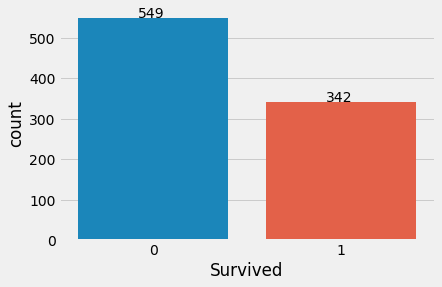

In [ ]:
#Exploring the data and understanding different variables
ax= sns.countplot(x='Survived',data=data)
#Code to show the axes lables
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.32, p.get_height()+0.01))
#Show the final plot
plt.show()

From the above plot, it can be inferred:

Number of people who survived - 342

Number of people who did not survive - 549

---



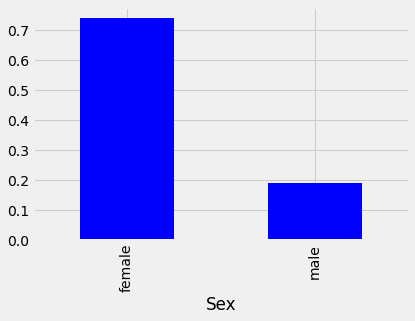

In [ ]:
# Plotting bar graphs for the categorical variable Sex
data.groupby('Sex').Survived.mean().plot(kind='bar', color= 'blue')

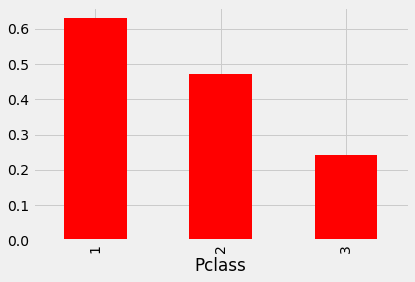

In [ ]:
# Plotting bar graphs for the categorical variable Pclass
data.groupby('Pclass').Survived.mean().plot(kind='bar', color= 'red')

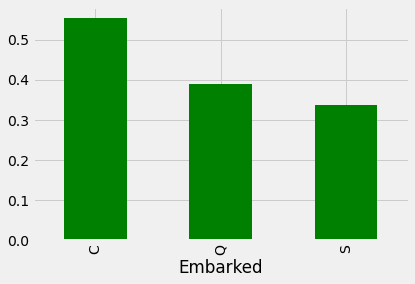

In [ ]:
# Plotting bar graphs for the categorical variable Embarked
data.groupby('Embarked').Survived.mean().plot(kind='bar', color='green')

From the above three plots on the mean value of Survived column, we can infer the following:


1.   Females have survived more than males
2.   Passengers in class 1 tend to survive more than classes 2 and 3
3.  Passengers with port of embarkation as Cherbourg tend to survive more than Southampton or Queenstown



# Data Preparation

We then move on to cleaning up the data

In [ ]:
#Check for missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked variables seem to have missing values.

Since Cabin has 687 missing values and our data contains 891 rows of data, we can drop the Cabin column as it will not have a significant effect on our response variable "Survived"

For Age column- calculate the mean of all the ages and fill the null values with the mean

For Embarked since there are only two missing values we add the mode to missing values



In [ ]:
#Handle the missing values
data= data.drop(columns=['Cabin'],axis=1)
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode()[0])

In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

No missing values in our data

In [ ]:
#Getting Information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Q1. Exploring Name column 

We then explore the Name column for patterns in predicting if the passenger survived or not

In [ ]:
# Exploring Name column for patterns
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888           Johnston, Miss. Catherine Helen \Carrie\""
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

We can see that the name column has titles Mr. , Miss, Mrs., Master etc. 

We can extract the column titles and see if there are any patterns with respect to the Titles

# Handling categorical variables

We also need to convert the other categorical variables to int format so we can perform Regression. 

We have Sex and Embarked that have distinct values to which we assign a numerical value as below

In [ ]:
#Handling the categorical variables to prepare for logistic regression
data['Sex'].replace('male', 1 ,inplace=True) 
data['Sex'].replace('female', 0, inplace= True)
data['Embarked'].replace(['S', 'C', 'Q'],[1,2,3],inplace=True)
#Extract the title in the name 
data['Title'] = data['Name'].str.extract(r', (\w+\.)') #Store the extracted title in a column Title
dummy = pd.get_dummies(data.Title, prefix='Titles')# Create dummy variables for Title 
data=pd.merge( # Merge the dummy variables to our dataset
    left=data,
    right=dummy,
    left_index=True,
    right_index=True,
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    int64  
 5   Age               891 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Embarked          891 non-null    int64  
 11  Title             890 non-null    object 
 12  Titles_Capt.      891 non-null    uint8  
 13  Titles_Col.       891 non-null    uint8  
 14  Titles_Don.       891 non-null    uint8  
 15  Titles_Dr.        891 non-null    uint8  
 16  Titles_Jonkheer.  891 non-null    uint8  
 1

Notice how all the columns we require in our Regression have been converted to type Int, ready for analysis!

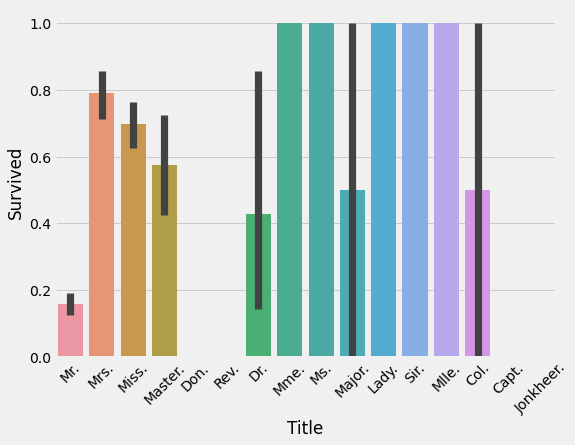

In [ ]:
#Visualizing the Title column to see patterns in predicting survival
plt.figure(figsize=(8,6))
sns.barplot(x= "Title",y='Survived', data = data)
plt.xticks(rotation='45')
plt.show()


We can see an insight into who is likely to survive based on the title as Mrs. could be translated to wife, and master/miss could be children and single ladies. Women are clearly less likely to survive than some men and this is contradicting our visualization of survival based on gender in the figure above

#Q2. Logistic Regression

In [ ]:
import numpy as np
list= np.array(x_test)
list.shape

(268, 23)

In [ ]:
#separate the x and y variables
x= data.loc[:, ~data.columns.isin(['Survived','PassengerId','Ticket','Title','Name'])]
y= data['Survived']
#split the dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)#Random state 0 will ensure a consistent result across samples
# Fit the Logistic regression model using training data
logreg = LogisticRegression(solver="liblinear")
logreg.fit(x_train, y_train)
#calcuate the predicted values using testing data
y_pred = logreg.predict(x_test)

#Confusion Matrix code
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


[[142  26]
 [ 23  77]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       168
           1       0.75      0.77      0.76       100

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



# Q3 Linear Regression

Linear Regression assumes that the response variable (dependent variable) is numeric or quantitative

Logistic Regression predicts the response(dependent) variable when it is of non-numeric type or qualitative

Our dataset is predicting whether a passenger survives or not which is not a numeric variable, but a qualitative data point. Therefore, we use Logistic regression and NOT linear regression


In [ ]:
#4. KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
#Createa a model using the pipelines library
model_2 = Pipeline([('a', MinMaxScaler()), ('b', KNeighborsClassifier())])
model_2.fit(x_train, y_train)
y_pred_pipe=model_2.predict(x_test)
#Confusion matrix for model_2
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_pipe)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_pipe))


[[142  26]
 [ 29  71]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       168
           1       0.73      0.71      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268




KNN is a lazy-learning algorithm and it does function is only approximated locally and all computation is deferred until function evaluation.

#Q5. KNN Using Grid Search

Grid search is essentially an optimization algorithm which lets you select the best parameters for your optimization problem from a list of parameter options that you provide, hence automating the 'trial-and-error' method

In [ ]:
from sklearn.model_selection import GridSearchCV #Import the Gridsearch functions
model_3 = KNeighborsRegressor()
grid_params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,20,21,22,23,24],
    'weights': ['distance'],
    'metric': ['euclidean', 'manhattan']
}
gs = GridSearchCV(KNeighborsRegressor(),
                  grid_params,
                  verbose=1,
                  cv=5,
                  n_jobs=-1)
gs_results = gs.fit(scaled_x_train, y_train)
pred_grid= gs.predict(scaled_x_test)
error = sqrt(mean_squared_error(y_test,pred_grid)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k= ' , gs_results.best_estimator_.n_neighbors , 'is:', error)
#gs_results.best_score_
#gs_results.best_estimator_
gs_results.best_params_


Fitting 5 folds for each of 46 candidates, totalling 230 fits
RMSE value for k=  15 is: 0.3822486380867736


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

#Q6 Using K=1 to see the model performance


In [ ]:
model_4 = KNeighborsRegressor(n_neighbors = 1)
model_4.fit(scaled_x_train, y_train)  #fit the model
pred_1= model_4.predict(scaled_x_test) #make prediction on test set
#Confusion matrix for model_4
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_1)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_1))
    

[[137  31]
 [ 31  69]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       168
           1       0.69      0.69      0.69       100

    accuracy                           0.77       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



#Q7. Model Performance using K=N, where N is the number of data points

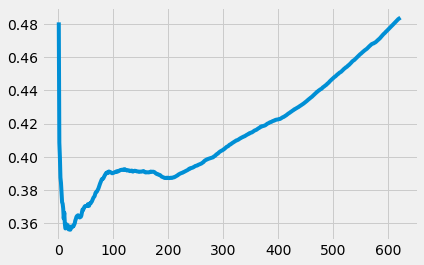

In [ ]:
# Using K= N where N is the number of data points in the training dataset
N= len(x_train)
rmse_val = [] #to store rmse values for different k
scores= []
k_range =range(1,N)
for K in k_range:  
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(scaled_x_train, y_train)  #fit the model
    pred=model.predict(scaled_x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    #print('RMSE value for k= ' , K-1 , 'is:', error)
plt.plot(k_range,rmse_val)

In [ ]:
# Classfication Using K= N where N is the number of data points in the training dataset 
kN = KNeighborsClassifier(n_neighbors = len(scaled_x_train)).fit(scaled_x_train,y_train)
pred_n = kN.predict(scaled_x_test)
print(classification_report(y_test,pred_n))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       168
           1       0.00      0.00      0.00       100

    accuracy                           0.63       268
   macro avg       0.31      0.50      0.39       268
weighted avg       0.39      0.63      0.48       268



We can see that this model has the lowest accuracy and is not a good classification